In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
df = yf.download('AAPL', start='2012-01-01', end='2023-12-17')
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.402625   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.469279   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.607716   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.739516   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.719305   
...                ...         ...         ...         ...         ...   
2023-12-11  193.110001  193.490005  191.419998  193.179993  192.449707   
2023-12-12  193.080002  194.720001  191.720001  194.710007  193.973953   
2023-12-13  195.089996  198.000000  194.850006  197.960007  197.211655   
2023-12-14  198.020004  199.619995  196.160004  198.110001  197.361084   
2023-12-15  197.529999  198.399994  197.000000  197.570007  196.823135   

               Volume  
Date         

In [5]:
df.shape

(3009, 6)

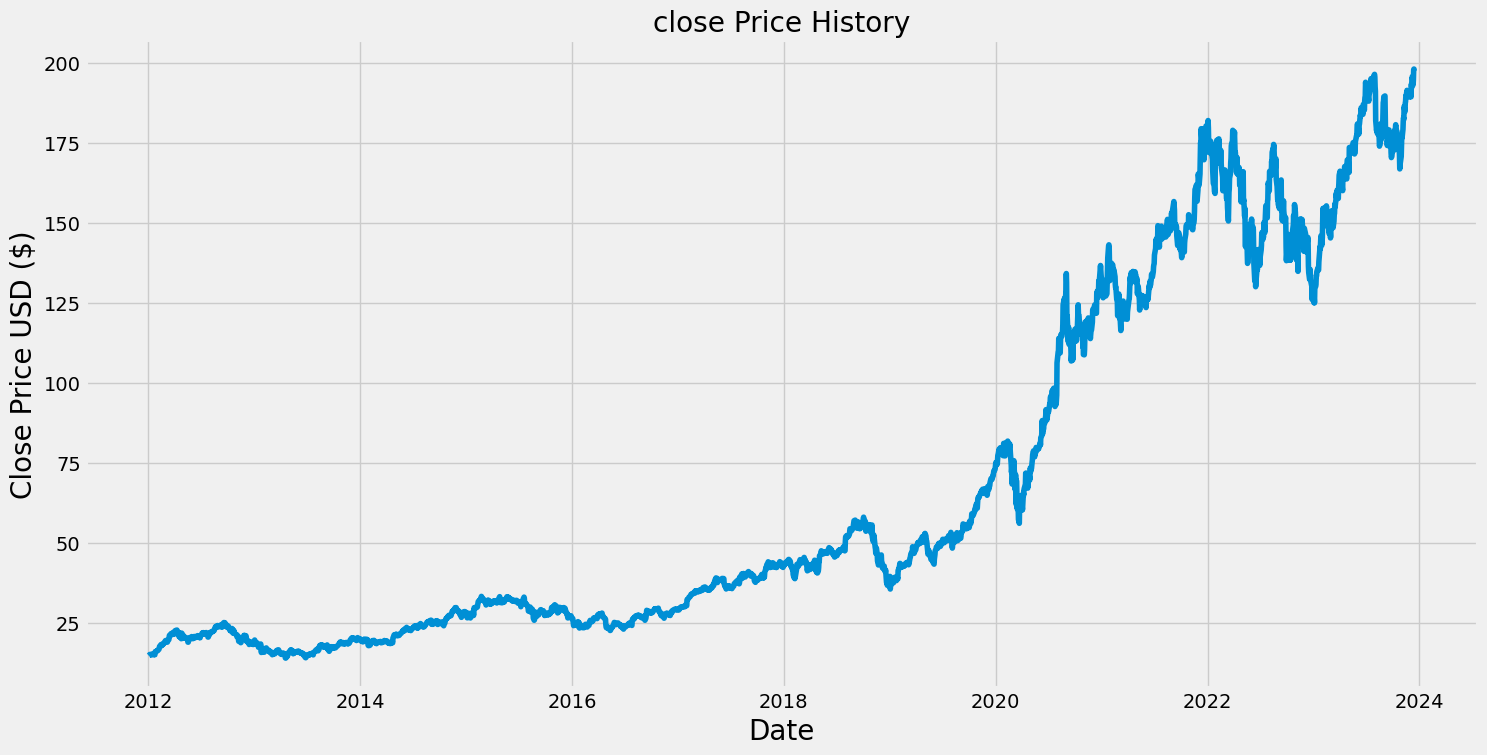

In [7]:
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price USD ($)',fontsize=20)
plt.show()

In [8]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2408

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.99918554],
       [1.        ],
       [0.99706784]])

In [24]:
train_data=scaled_data[0:training_data_len,:]
train_data
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [25]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [26]:
x_train

array([[0.00401431, 0.00444289, 0.00533302, ..., 0.04197573, 0.0434302 ,
        0.04403914],
       [0.00444289, 0.00533302, 0.00618049, ..., 0.0434302 , 0.04403914,
        0.04253425],
       [0.00533302, 0.00618049, 0.00605056, ..., 0.04403914, 0.04253425,
        0.04053485],
       ...,
       [0.64905991, 0.63809139, 0.64395571, ..., 0.71378534, 0.72138738,
        0.73094412],
       [0.63809139, 0.64395571, 0.6184891 , ..., 0.72138738, 0.73094412,
        0.73327906],
       [0.64395571, 0.6184891 , 0.61984663, ..., 0.73094412, 0.73327906,
        0.72122448]])

In [27]:
x_train.shape

(2348, 60)

In [29]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2348, 60, 1)

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2348/2348 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - loss: 0.0030


In [36]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [37]:
x_test=np.array(x_test)

In [38]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [39]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


In [40]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.7004019916553466

C:\Users\jasha\AppData\Local\Temp\ipykernel_24164\1803174402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


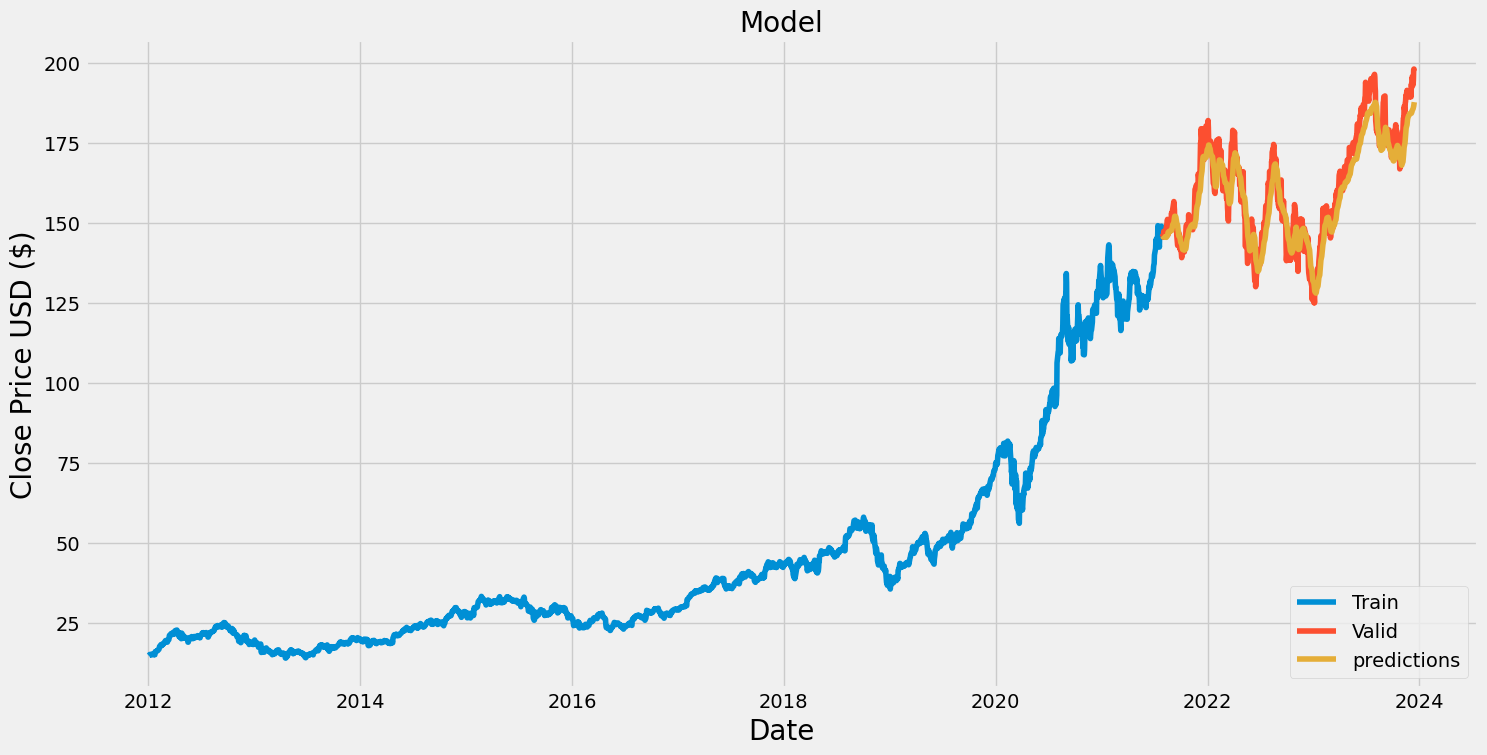

In [42]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price USD ($)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','predictions'],loc='lower right')
plt.show()

In [43]:
valid

,Close,predictions
Date,,
2021-07-29,145.639999,145.958710
2021-07-30,145.860001,145.865311
2021-08-02,145.520004,145.743774
2021-08-03,147.360001,145.586548
2021-08-04,146.949997,145.574478
...,...,...
2023-12-11,193.179993,185.713196
2023-12-12,194.710007,186.092224
2023-12-13,197.960007,186.489655


In [57]:
import yfinance as yf
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]

X_test.append(last_60_days_scaled)
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)

pred_price=scaler.inverse_transform(pred_price)
print(pred_price)



[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[65.47971]]


In [59]:
apple_quote2 = yf.download('AAPL', start='2019-12-17', end='2019-12-18')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2019-12-17    70.102501
Name: Close, dtype: float64
